# Estadistica Aplicada

Sesion 17, 02 de septiembre

Jesus Adrian Cordero Hernandez 1952778

GPO 41

In [27]:
## 1-Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# Configurar tamaño de la grafica
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12
## Importar holt-winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [29]:
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv',index_col='Month',parse_dates=True)
pasajeros

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


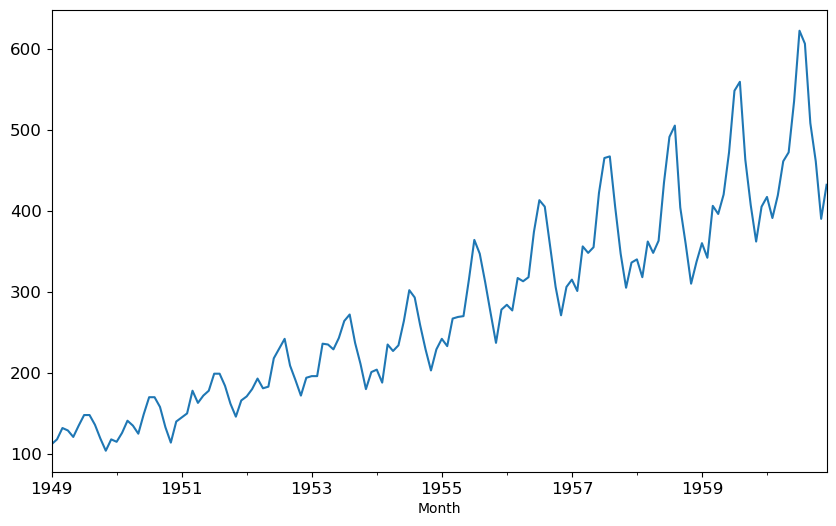

In [30]:
pasajeros['Thousands of Passengers'].plot();

In [31]:
## promedio movil simple a 12 meses
pasajeros['PMS-12'] = pasajeros['Thousands of Passengers'].rolling(12).mean()
## promedio movil centrado a 11 meses (tiene que ser impar)
pasajeros['PMC-11'] = pasajeros['Thousands of Passengers'].rolling(11,center=True).mean()

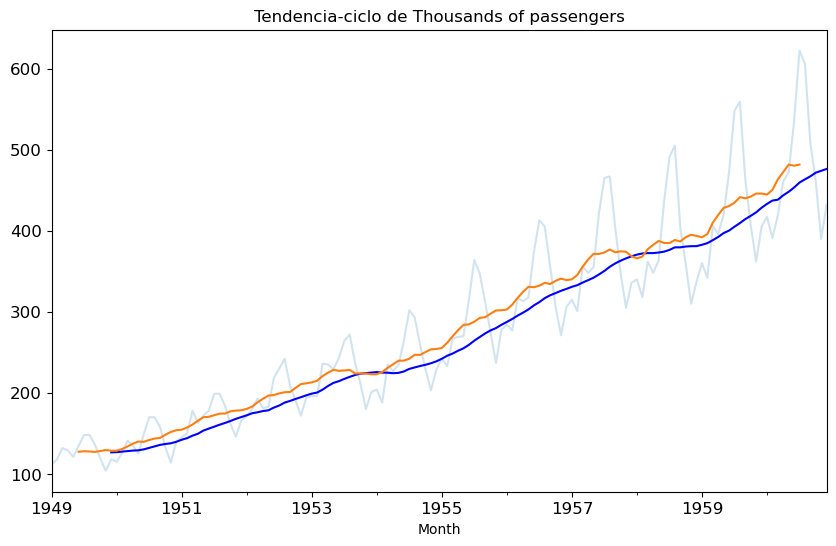

In [32]:
## Graficar la serie original vs PMS-12, PMC-11
pasajeros['Thousands of Passengers'].plot(alpha=0.2)
pasajeros['PMS-12'].plot(color='blue')
pasajeros['PMC-11'].plot()
plt.title('Tendencia-ciclo de Thousands of passengers');

In [33]:
## suavizamiento exponencial doble(PMS - ponderado exponencialmente) (xponential weight moving average)
pasajeros['SED'] = pasajeros['Thousands of Passengers'].ewm(span=12,adjust=False).mean()
pasajeros

,Thousands of Passengers,PMS-12,PMC-11,SED
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,112.923077
1949-03-01,132,NaN,NaN,115.857988
1949-04-01,129,NaN,NaN,117.879836
1949-05-01,121,NaN,NaN,118.359861
...,...,...,...,...
1960-08-01,606,463.333333,NaN,494.898619
1960-09-01,508,467.083333,NaN,496.914216
1960-10-01,461,471.583333,NaN,491.388952


In [34]:
## metodologia Holt-winters
## suavizamiento exponencial doble
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [35]:
## asignarle frecuencia - mensual
## mensual MS(month start)
pasajeros = pasajeros.asfreq('MS')
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

generalmente para utilizar una serie de tiempo debe de haber una variable de fecha y debe tener una frecuencia asignada 

In [38]:
## suavizamiento exponencial doble
## 1. serie original 2. tendencia
pasajeros['SED'] = ExponentialSmoothing(pasajeros['Thousands of Passengers'],trend='mul')